In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

**Data Exploration**

In [168]:
Data = "Downloads/Employee.csv"

DF = pd.read_csv(Data)
DF.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [145]:
for col in DF.columns:
    print(f"Column:{col}")
    print("Unique Values:", DF[col].unique())
    print("Number of Unique Values :", DF[col].nunique())
    print("-" *20)

Column:Company
Unique Values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Number of Unique Values : 6
--------------------
Column:Age
Unique Values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Number of Unique Values : 29
--------------------
Column:Salary
Unique Values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Number of Unique Values : 40
--------------------
Column:Place
Unique Values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Number of Unique Values : 11
--------------------
Column:Country
Unique Values: ['India']
Number of Unique Values : 1
--------------------
Column:Gender
Unique Valu

In [146]:
DF.describe(include='all')

,Company,Age,Salary,Place,Country,Gender
count,140,130.000000,124.000000,134,148,148.000000
unique,6,NaN,NaN,11,1,NaN
top,TCS,NaN,NaN,Mumbai,India,NaN
freq,53,NaN,NaN,37,148,NaN
mean,NaN,30.484615,5312.467742,NaN,NaN,0.222973
std,NaN,11.096640,2573.764683,NaN,NaN,0.417654
min,NaN,0.000000,1089.000000,NaN,NaN,0.000000
25%,NaN,22.000000,3030.000000,NaN,NaN,0.000000
50%,NaN,32.500000,5000.000000,NaN,NaN,0.000000
75%,NaN,37.750000,8000.000000,NaN,NaN,0.000000


In [176]:
DF.rename(columns={"Place":"City","Company":"Organization", "Gender":"Sex","Salary":"Employee_Salary"}, inplace=True)
DF

,Organization,Age,Employee_Salary,City,Country,Sex
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


**Data Cleaning**

In [149]:
DF['Sex'] = DF['Sex'].replace(0,np.nan)
DF.isnull().sum()

Organization         8
Age                 18
Employee_Salary     24
City                14
Country              0
Sex                115
dtype: int64

In [150]:
DF['Sex'].fillna(DF['Sex'].median(), inplace=True)

C:\Users\nived\AppData\Local\Temp\ipykernel_32408\3089723860.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DF['Sex'].fillna(DF['Sex'].median(), inplace=True)


In [151]:
for col in DF.columns:
    if DF[col].dtype == "object":
        DF[col].fillna(DF[col].mode()[0],inplace=True)
    else:
        DF[col].fillna(DF[col].median(), inplace=True)

C:\Users\nived\AppData\Local\Temp\ipykernel_32408\2785107240.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DF[col].fillna(DF[col].mode()[0],inplace=True)
C:\Users\nived\AppData\Local\Temp\ipykernel_32408\2785107240.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [152]:
DF.isnull().sum()

Organization       0
Age                0
Employee_Salary    0
City               0
Country            0
Sex                0
dtype: int64

In [153]:
DF.drop_duplicates(inplace=True)

<Axes: >

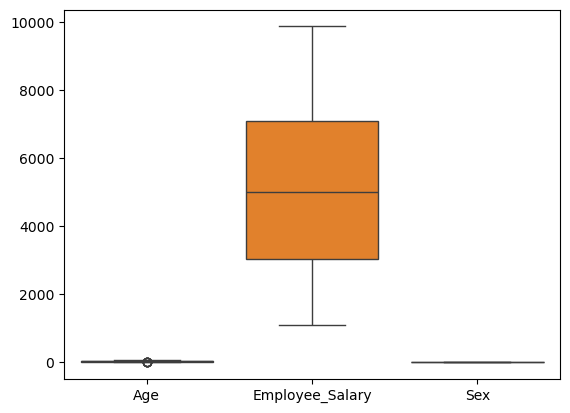

In [154]:
sns.boxplot(DF)

<Axes: ylabel='Age'>

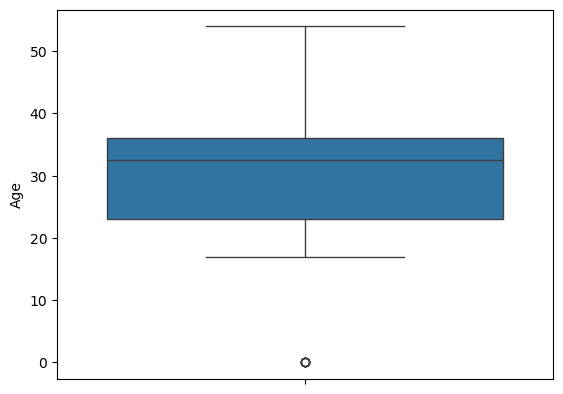

In [155]:
sns.boxplot(DF['Age'])

In [156]:
q1,q2,q3 = np.percentile(DF['Age'],[25,50,75])
IQR = q3-q1
IQR

np.float64(13.0)

In [157]:
lowerlimit = q1-1.5*IQR
upperlimit = q3+1.5*IQR
print(lowerlimit)
print(upperlimit)

3.5
55.5


In [174]:
Outliers = DF[(DF['Age'] >= lowerlimit) & (DF['Age'] <= upperlimit)]

<Axes: ylabel='Age'>

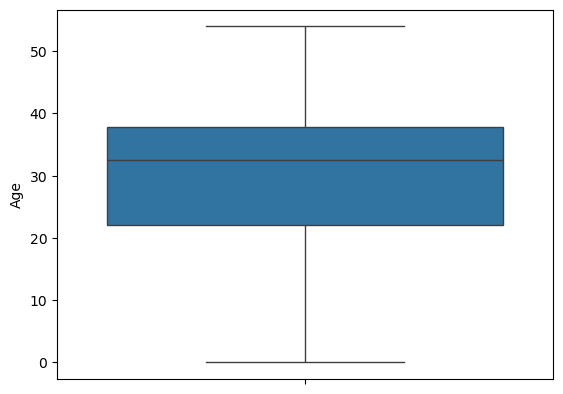

In [175]:
sns.boxplot(DF['Age'])

**Data Analysis**

In [160]:
FilteredData = DF[(DF['Age'] > 40) & (DF['Employee_Salary'] < 5000)]

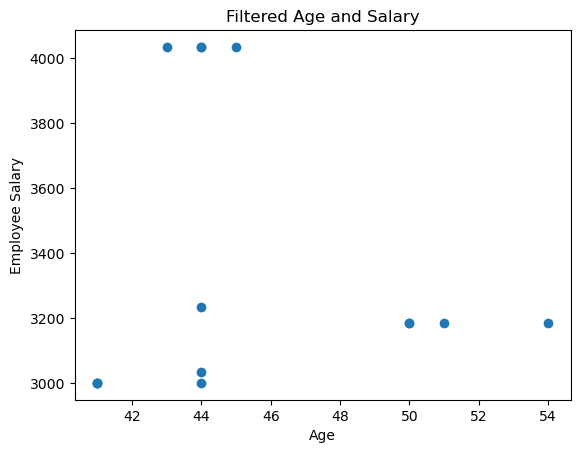

In [161]:
plt.scatter(FilteredData['Age'], FilteredData['Employee_Salary'])
plt.xlabel('Age')
plt.ylabel('Employee Salary')
plt.title('Filtered Age and Salary')
plt.show()

In [162]:
Place_Counts = DF['City'].value_counts()
Place_Counts

City
Mumbai        47
Calcutta      31
Chennai       14
Delhi         13
Cochin        12
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

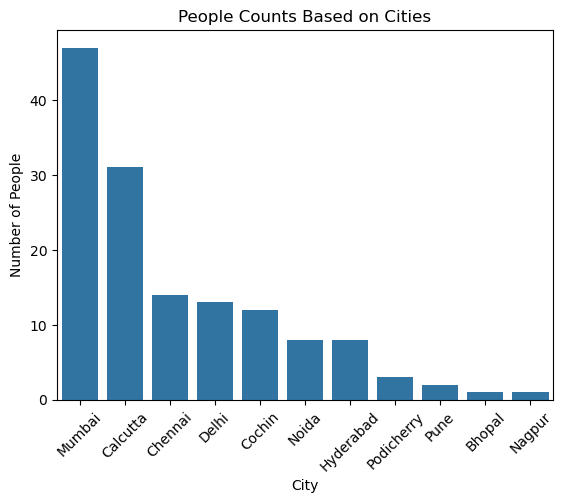

In [163]:
sns.barplot(x=Place_Counts.index, y=Place_Counts.values)
plt.xticks(rotation=45)
plt.ylabel("Number of People")
plt.title('People Counts Based on Cities')
plt.show()

**Data Encoding**

In [164]:
DF.columns

Index(['Organization', 'Age', 'Employee_Salary', 'City', 'Country', 'Sex'], dtype='object')

In [167]:
LE = LabelEncoder()
DF['Sex'] = LE.fit_transform(DF['Sex'])
DF_Dummy = pd.get_dummies(DF, columns=['City'], drop_first=True)
DF_Dummy.head()

,Organization,Age,Employee_Salary,Country,Sex,City_Calcutta,City_Chennai,City_Cochin,City_Delhi,City_Hyderabad,City_Mumbai,City_Nagpur,City_Noida,City_Podicherry,City_Pune
0,TCS,20.0,5000.0,India,0,False,True,False,False,False,False,False,False,False,False
1,Infosys,30.0,5000.0,India,0,False,False,False,False,False,True,False,False,False,False
2,TCS,35.0,2300.0,India,0,True,False,False,False,False,False,False,False,False,False
3,Infosys,40.0,3000.0,India,0,False,False,False,True,False,False,False,False,False,False
4,TCS,23.0,4000.0,India,0,False,False,False,False,False,True,False,False,False,False


**Feature Scaling**

In [173]:
Scaler = StandardScaler()
DF_Scaled = Scaler.fit_transform(DF.select_dtypes(include=['int64','float64']))
DF_Scaled = pd.DataFrame(DF_Scaled, columns=DF.select_dtypes(include=['int64','float64']).columns)

MinMax = MinMaxScaler()
DF_MinMax = MinMax.fit_transform(DF.select_dtypes(include=['int64','float64']))
DF_MinMax = pd.DataFrame(DF_MinMax, columns=DF.select_dtypes(include=['int64','float64']).columns)

DF_Scaled.head()
DF_MinMax.head()

,Age,Salary,Gender
0,0.370370,NaN,0.0
1,0.555556,NaN,0.0
2,0.648148,0.137817,0.0
3,0.740741,0.217480,0.0
4,0.425926,0.331285,0.0
